In [18]:
import numpy as np # linear algebra #rgb values for images exist in a np array
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import PIL # Importing Image class from PIL module
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
#import time
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
#from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [2]:
data_path = "/content/drive/MyDrive/project data"
Categories = ["Free", "Full"]
img_size = 150

In [3]:
data = []

def create_data():
    for category in Categories:
        path = os.path.join(data_path,category)
        class_num = Categories.index(category)
        print(path) #lepath to each category file
        for img in os.listdir(path):
            print(img) #path to each image in the category files
            img_arr = cv2.imread(os.path.join(path,img))
            new_img_arr = cv2.resize(img_arr,(img_size,img_size))
            data.append([new_img_arr,class_num])
create_data()

/content/drive/MyDrive/project data/Free
img_1006151557.jpg
img_1006170558.jpg
img_1006163057.jpg
img_1006164058.jpg
img_1006162558.jpg
img_1007082558.jpg
img_1006154057.jpg
img_1006171058.jpg
img_1006165058.jpg
img_1006160558.jpg
img_1006155057.jpg
img_1006163558.jpg
img_1006162058.jpg
img_1006161558.jpg
img_1006164557.jpg
img_1006153557.jpg
img_1006160058.jpg
img_1006165558.jpg
img_1006155558.jpg
img_1006154558.jpg
img_1006161058.jpg
img_1007092058.jpg
img_1007085558.jpg
img_1007091058.jpg
img_1007122057.jpg
img_1007091558.jpg
img_1007104558.jpg
img_1007102557.jpg
img_1007103057.jpg
img_1007105057.jpg
img_1007092558.jpg
img_1007103558.jpg
img_1007104058.jpg
img_1007105558.jpg
img_1007083058.jpg
img_1007084558.jpg
img_1007084058.jpg
img_1007090558.jpg
img_1007090058.jpg
img_1007083559.jpg
img_1007085058.jpg
img_1008101558.jpg
img_1008100558.jpg
img_1007175058.jpg
img_1008102557.jpg
img_1007122558.jpg
img_1007171557.jpg
img_1008102058.jpg
img_1007173058.jpg
img_1007180557.jpg
img_10081

In [4]:
print(len(data))
3262

1952


3262

In [5]:
X= [] #store images
Y= [] #store lables["free","full"]

In [6]:
for features, labels in data:
    X.append(features)
    Y.append(labels)

In [7]:
X[0]

array([[[111,  96, 117],
        [113,  99, 117],
        [135, 127, 145],
        ...,
        [240, 232, 242],
        [224, 208, 228],
        [201, 183, 210]],

       [[111,  96, 117],
        [115, 101, 119],
        [158, 150, 169],
        ...,
        [210, 189, 214],
        [204, 184, 210],
        [201, 179, 206]],

       [[112,  99, 116],
        [112,  98, 115],
        [165, 156, 177],
        ...,
        [186, 166, 192],
        [240, 240, 242],
        [195, 176, 199]],

       ...,

       [[ 85,  70,  79],
        [107,  91, 100],
        [109,  93, 102],
        ...,
        [ 86,  68,  69],
        [ 82,  64,  67],
        [ 80,  62,  67]],

       [[100,  87,  92],
        [106,  92,  98],
        [107,  93,  99],
        ...,
        [182, 140, 117],
        [162, 128, 107],
        [102,  85,  88]],

       [[101,  90,  93],
        [104,  91,  97],
        [104,  88,  96],
        ...,
        [112,  92,  90],
        [108,  89,  86],
        [ 89,  75,  79]]

In [8]:
# separate data
#training data - 80% of data
#testing data - 20% of data
#random_state is used to get the same split everytime. If we do not fix it, it would result in a different split everytme the code is run
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [9]:
def process_images(image):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 277x277
    image = tf.image.resize(image, (227,227))
    return image

In [10]:
x_train = process_images(x_train)
x_test = process_images(x_test)

In [11]:
x_train = np.array(x_train).reshape(-1, 227, 227, 3)
y_train = np.array(y_train)
x_test = np.array(x_test).reshape(-1, 227, 227, 3)
y_test = np.array(y_test)

In [12]:
x_validate = x_train[:520]
x_train = x_train[521:]
y_validate = y_train[:520]
y_train = y_train[521:]

In [13]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu', input_shape=(227,227,3)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu', input_shape=(227,227,3)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax', input_shape=(227,227,3))
])

In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

In [15]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",mode ="min", patience = 5,restore_best_weights = True)

In [17]:
# fit the model
history = model.fit(x_train,y_train, epochs=25, validation_data = (x_validate,y_validate),callbacks =[earlystopping])

Epoch 1/25
33/33 [==============================] - 145s 4s/step - loss: 0.0530 - accuracy: 0.9817 - val_loss: 0.1309 - val_accuracy: 0.9558
Epoch 2/25
33/33 [==============================] - 141s 4s/step - loss: 0.0449 - accuracy: 0.9865 - val_loss: 0.1340 - val_accuracy: 0.9558
Epoch 3/25
33/33 [==============================] - 132s 4s/step - loss: 0.0478 - accuracy: 0.9827 - val_loss: 0.1245 - val_accuracy: 0.9635
Epoch 4/25
33/33 [==============================] - 134s 4s/step - loss: 0.0438 - accuracy: 0.9827 - val_loss: 0.1254 - val_accuracy: 0.9577
Epoch 5/25
33/33 [==============================] - 129s 4s/step - loss: 0.0382 - accuracy: 0.9885 - val_loss: 0.1558 - val_accuracy: 0.9558
Epoch 6/25
33/33 [==============================] - 131s 4s/step - loss: 0.0244 - accuracy: 0.9942 - val_loss: 0.1328 - val_accuracy: 0.9654
Epoch 7/25
33/33 [==============================] - 134s 4s/step - loss: 0.0287 - accuracy: 0.9904 - val_loss: 0.1221 - val_accuracy: 0.9615
Epoch 8/25
33

In [19]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 18s 1s/step - loss: 0.1477 - accuracy: 0.9591


[0.14772211015224457, 0.9590792655944824]

In [20]:
# getting predictions on test set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

13/13 [==============================] - 12s 899ms/step


In [21]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(y_test[i] ==pred_digits[i]):
        prop_class.append(i)
    else:
        mis_class.append(i)

print("Properly predicted: " + str(len(prop_class)))
print("Misclassified: " + str(len(mis_class)))

Properly predicted: 375
Misclassified: 16


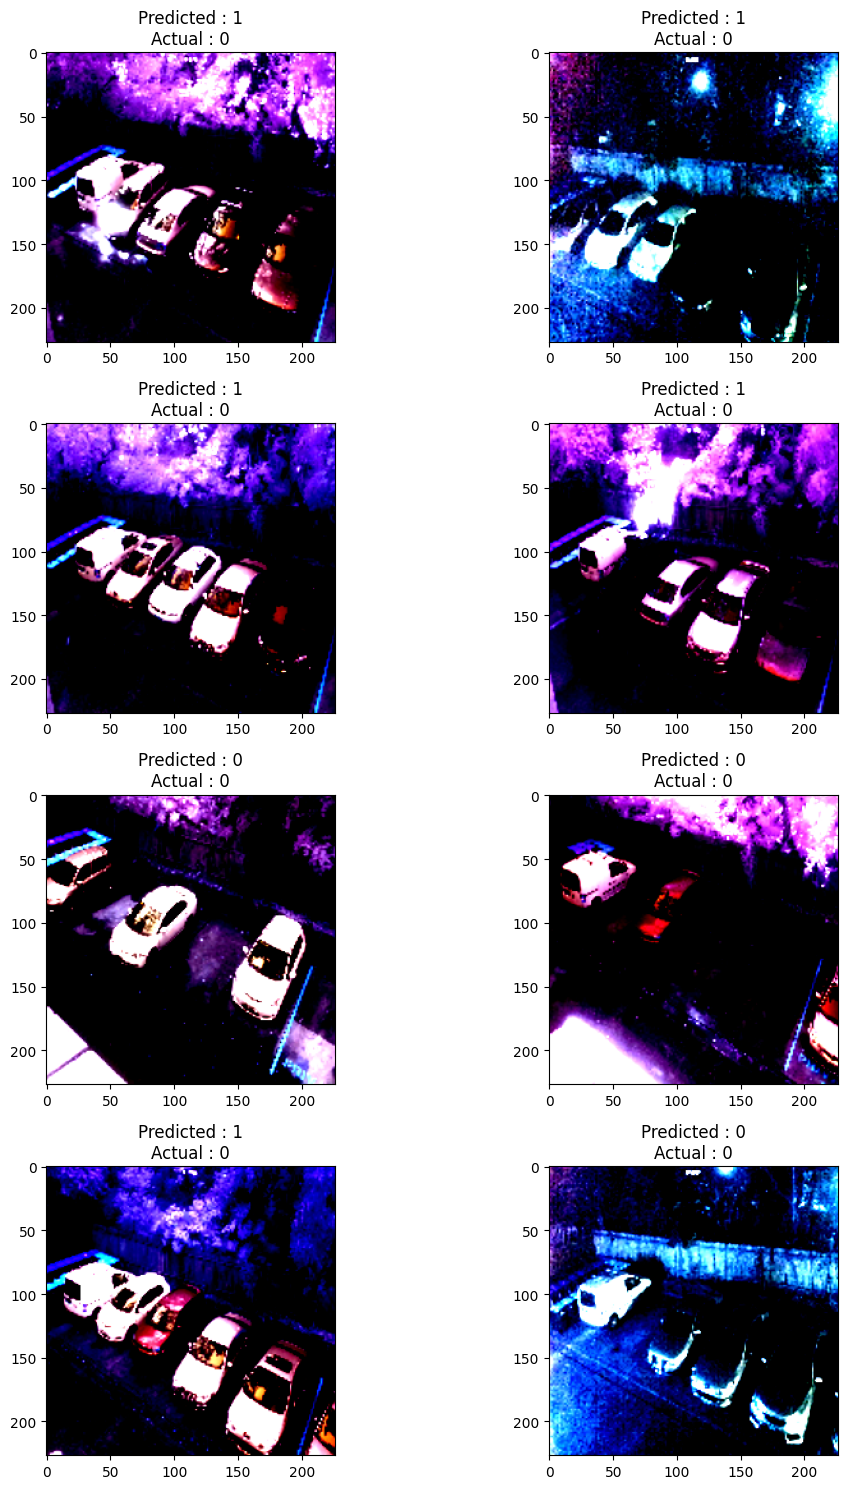

In [22]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted : "+str(pred_digits[prop_class[count]])+"\n"+"Actual : "+str(np.argmax([y_test[prop_class[count]]])))
        plt.tight_layout()
        count+=1

In [47]:
test_data_path = "/content/drive/MyDrive/project data/owu-images" #Loading image from url
owu_img_data = []
owu_img_np=[]
for owu_test_img in os.listdir(test_data_path):
   # print(owu_test_img)
    owu_img_data.append(os.path.join(test_data_path,owu_test_img))
    test_img_arr = cv2.imread(os.path.join(test_data_path,owu_test_img))
    test_new_img_arr = cv2.resize(test_img_arr,(img_size,img_size))
    test_img = process_images(test_new_img_arr)
    test_img= tf.image.per_image_standardization(test_img) #added
    test_img = np.array(test_img).reshape(-1, 227, 227, 3) #converting rgb values into np aaray
    owu_img_np.append(test_img)

In [49]:
owu_predictions=[]
for test_img in owu_img_np:
        owu_pred=model.predict(test_img)
        owu_pred_digits=np.argmax(owu_pred,axis=1)
        owu_predictions.append(float(owu_pred_digits))


1/1 [==============================] - 0s 60ms/step


In [51]:
owu_results = []
for pred in owu_predictions:
    if(pred == 0):
        owu_results.append("free")
    else:
        owu_results.append("full")

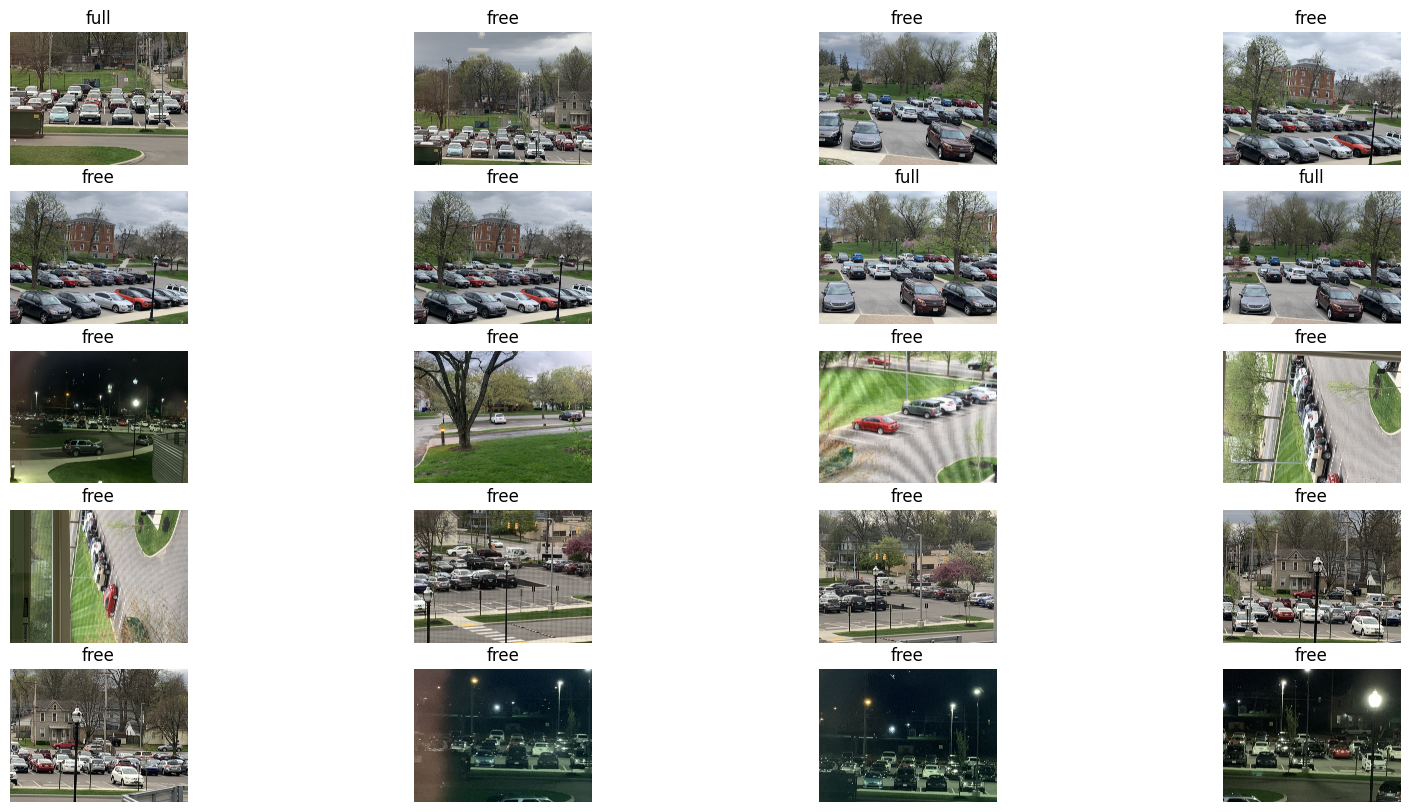

In [52]:
fig = plt.figure(figsize=(20,10))
k=0
for test_img in owu_img_data:
    k = k+1
    fig.add_subplot(5,4,k)
    plt.imshow(imread(test_img))
    plt.axis('off')
    plt.title(owu_results[owu_img_data.index(test_img)])
plt.show()